<a href="https://colab.research.google.com/github/shameer-phy/ML/blob/main/Hackathons/univ.ai/Univhack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import drive 

drive.mount("/content/gdrive") 

Mounted at /content/gdrive


In [3]:
# Lets read the training dataset and tes dataset

df = pd.read_csv('/content/gdrive/My Drive/Datasets/univ.ai/Training Data.csv')
 
df_test = pd.read_csv('/content/gdrive/My Drive/Datasets/univ.ai/Test Data.csv')


#Lets do som exploratory data analysis

In [4]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.shape

(252000, 13)

In [6]:
df.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [7]:
df.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

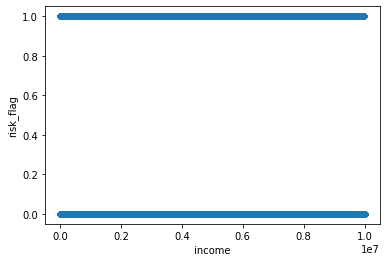

In [8]:
df.plot.scatter('income','risk_flag')

In [9]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

In [10]:
!pip install researchpy
def chi2test(x,y):
  import researchpy as rp
  t = rp.crosstab(x,y,test='chi-square')
  if t[1].iloc[1,1] < 0.05:
    print(t[0])
    print('Depedent. Drop a variable')
  else:
    print('Independent. Keep both')

In [11]:
chi2test(df[obj_cols[0]],df[obj_cols[1]])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                house_ownership                       
house_ownership    norent_noown  owned  rented     All
married                                               
married                     595    923   24210   25728
single                     6589  11995  207688  226272
All                        7184  12918  231898  252000
Depedent. Drop a variable


In [12]:
chi2test(df[obj_cols[0]],df[obj_cols[2]])

Independent. Keep both


In [13]:
chi2test(df[obj_cols[0]],df[obj_cols[3]])

                       profession          ...                     
profession Air_traffic_controller Analyst  ... Web_designer     All
married                                    ...                     
married                       543     459  ...          588   25728
single                       4738    4209  ...         4809  226272
All                          5281    4668  ...         5397  252000

[3 rows x 52 columns]
Depedent. Drop a variable


In [14]:
chi2test(df[obj_cols[0]],df[obj_cols[4]])

         city                 ...                                     
city    Adoni Agartala  Agra  ... Warangal[11][12] Yamunanagar     All
married                       ...                                     
married    87      128    88  ...               10          89   25728
single    866      681   924  ...              449         570  226272
All       953      809  1012  ...              459         659  252000

[3 rows x 318 columns]
Depedent. Drop a variable


In [15]:
chi2test(df[obj_cols[0]],df[obj_cols[5]])

                 state               ...                                
state   Andhra_Pradesh Assam  Bihar  ... Uttarakhand West_Bengal     All
married                              ...                                
married           2994   525   1937  ...          92        2870   25728
single           22303  6537  17843  ...        1782       20613  226272
All              25297  7062  19780  ...        1874       23483  252000

[3 rows x 30 columns]
Depedent. Drop a variable


In [16]:
obj_cols

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

In [17]:
df.nunique()

Id                     252000
income                  41917
age                        59
experience                 21
married                     2
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64

In [18]:
obj_cols = list(obj_cols)
obj_cols.remove('profession')
obj_cols.remove('car_ownership')

In [19]:
obj_cols

['married', 'house_ownership', 'city', 'state']

In [20]:
obj_cols.append('Id')

In [21]:
obj_cols

['married', 'house_ownership', 'city', 'state', 'Id']

In [22]:
new_df = df.drop(obj_cols,axis=1)


In [23]:
obj_cols.remove('Id')
obj_cols.append('id')
new_dftest = df_test.drop(obj_cols,axis=1)

In [24]:
new_df.head()

,income,age,experience,car_ownership,profession,current_job_years,current_house_years,risk_flag
0,1303835,23,3,no,Mechanical_engineer,3,13,0
1,7574516,40,10,no,Software_Developer,9,13,0
2,3991815,66,4,no,Technical_writer,4,10,0
3,6256451,41,2,yes,Software_Developer,2,12,1
4,5768871,47,11,no,Civil_servant,3,14,1


In [25]:
new_df.corr()

,income,age,experience,current_job_years,current_house_years,risk_flag
income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
current_job_years,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
current_house_years,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
risk_flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [26]:
new_df.nunique()

income                 41917
age                       59
experience                21
car_ownership              2
profession                51
current_job_years         15
current_house_years        5
risk_flag                  2
dtype: int64

In [27]:
new_df = new_df.drop('current_job_years',axis=1)
new_dftest = new_dftest.drop('current_job_years',axis=1)

In [28]:
new_df.corr()

,income,age,experience,current_house_years,risk_flag
income,1.000000,-0.000652,0.006422,-0.002397,-0.003091
age,-0.000652,1.000000,-0.001118,-0.020134,-0.021809
experience,0.006422,-0.001118,1.000000,0.019309,-0.034523
current_house_years,-0.002397,-0.020134,0.019309,1.000000,-0.004375
risk_flag,-0.003091,-0.021809,-0.034523,-0.004375,1.000000


In [29]:
new_df = pd.get_dummies(new_df,columns=['profession','car_ownership'])
new_dftest = pd.get_dummies(new_dftest,columns=['profession','car_ownership'])

In [30]:
new_df.shape
new_dftest.shape

(28000, 57)

In [31]:
new_df.head()

,income,age,experience,current_house_years,risk_flag,profession_Air_traffic_controller,profession_Analyst,profession_Architect,profession_Army_officer,profession_Artist,profession_Aviator,profession_Biomedical_Engineer,profession_Chartered_Accountant,profession_Chef,profession_Chemical_engineer,profession_Civil_engineer,profession_Civil_servant,profession_Comedian,profession_Computer_hardware_engineer,profession_Computer_operator,profession_Consultant,profession_Dentist,profession_Design_Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion_Designer,profession_Financial_Analyst,profession_Firefighter,profession_Flight_attendant,profession_Geologist,profession_Graphic_Designer,profession_Hotel_Manager,profession_Industrial_Engineer,profession_Lawyer,profession_Librarian,profession_Magistrate,profession_Mechanical_engineer,profession_Microbiologist,profession_Official,profession_Petroleum_Engineer,profession_Physician,profession_Police_officer,profession_Politician,profession_Psychologist,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer,car_ownership_no,car_ownership_yes
0,1303835,23,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7574516,40,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3991815,66,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,6256451,41,2,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5768871,47,11,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
new_dftest.head()

,income,age,experience,current_house_years,profession_Air traffic controller,profession_Analyst,profession_Architect,profession_Army officer,profession_Artist,profession_Aviator,profession_Biomedical Engineer,profession_Chartered Accountant,profession_Chef,profession_Chemical engineer,profession_Civil engineer,profession_Civil servant,profession_Comedian,profession_Computer hardware engineer,profession_Computer operator,profession_Consultant,profession_Dentist,profession_Design Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion Designer,profession_Financial Analyst,profession_Firefighter,profession_Flight attendant,profession_Geologist,profession_Graphic Designer,profession_Hotel Manager,profession_Industrial Engineer,profession_Lawyer,profession_Librarian,profession_Magistrate,profession_Mechanical engineer,profession_Microbiologist,profession_Official,profession_Petroleum Engineer,profession_Physician,profession_Police officer,profession_Politician,profession_Psychologist,profession_Scientist,profession_Secretary,profession_Software Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical writer,profession_Technician,profession_Technology specialist,profession_Web designer,car_ownership_no,car_ownership_yes
0,7393090,59,19,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1215004,25,5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8901342,50,12,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1944421,49,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13429,25,18,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#Lets split the data into X,Y and standardize

In [44]:
def check_mod(name,x,y):
  for i in range(3):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify=Y)
    mod = name
    mod.fit(xtrain,ytrain)
    ypred= mod.predict(xtest)
    print('roc_auc:',roc_auc_score(ytest,ypred))

In [35]:
X = new_df.drop('risk_flag',axis=1)
Y = new_df['risk_flag']

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [41]:
X_std = pd.DataFrame(X_std,columns=X.columns)
X_std.head()

,income,age,experience,current_house_years,profession_Air_traffic_controller,profession_Analyst,profession_Architect,profession_Army_officer,profession_Artist,profession_Aviator,profession_Biomedical_Engineer,profession_Chartered_Accountant,profession_Chef,profession_Chemical_engineer,profession_Civil_engineer,profession_Civil_servant,profession_Comedian,profession_Computer_hardware_engineer,profession_Computer_operator,profession_Consultant,profession_Dentist,profession_Design_Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion_Designer,profession_Financial_Analyst,profession_Firefighter,profession_Flight_attendant,profession_Geologist,profession_Graphic_Designer,profession_Hotel_Manager,profession_Industrial_Engineer,profession_Lawyer,profession_Librarian,profession_Magistrate,profession_Mechanical_engineer,profession_Microbiologist,profession_Official,profession_Petroleum_Engineer,profession_Physician,profession_Police_officer,profession_Politician,profession_Psychologist,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer,car_ownership_no,car_ownership_yes
0,-1.283145,-1.579603,-1.180232,0.716356,-0.146304,-0.137381,-0.137216,-0.137276,-0.140247,-0.138724,-0.14411,-0.134733,-0.136885,-0.145225,-0.136599,-0.133507,-0.145993,-0.147587,-0.142132,-0.139465,-0.13908,-0.138292,-0.136327,-0.147404,-0.135949,-0.127772,-0.146629,-0.144683,-0.134947,-0.144125,-0.137441,-0.144669,-0.14484,-0.145865,-0.139613,-0.13678,-0.147376,6.877763,-0.14054,-0.128396,-0.142872,-0.1556,-0.142785,-0.141463,-0.147839,-0.139065,-0.143161,-0.143045,-0.153568,-0.138932,-0.138069,-0.145083,-0.140291,-0.138411,-0.147937,0.657129,-0.657129
1,0.895457,-0.583343,-0.014067,0.716356,-0.146304,-0.137381,-0.137216,-0.137276,-0.140247,-0.138724,-0.14411,-0.134733,-0.136885,-0.145225,-0.136599,-0.133507,-0.145993,-0.147587,-0.142132,-0.139465,-0.13908,-0.138292,-0.136327,-0.147404,-0.135949,-0.127772,-0.146629,-0.144683,-0.134947,-0.144125,-0.137441,-0.144669,-0.14484,-0.145865,-0.139613,-0.13678,-0.147376,-0.145396,-0.14054,-0.128396,-0.142872,-0.1556,-0.142785,-0.141463,-0.147839,-0.139065,-0.143161,6.990806,-0.153568,-0.138932,-0.138069,-0.145083,-0.140291,-0.138411,-0.147937,0.657129,-0.657129
2,-0.349269,0.940347,-1.013637,-1.427981,-0.146304,-0.137381,-0.137216,-0.137276,-0.140247,-0.138724,-0.14411,-0.134733,-0.136885,-0.145225,-0.136599,-0.133507,-0.145993,-0.147587,-0.142132,-0.139465,-0.13908,-0.138292,-0.136327,-0.147404,-0.135949,-0.127772,-0.146629,-0.144683,-0.134947,-0.144125,-0.137441,-0.144669,-0.14484,-0.145865,-0.139613,-0.13678,-0.147376,-0.145396,-0.14054,-0.128396,-0.142872,-0.1556,-0.142785,-0.141463,-0.147839,-0.139065,-0.143161,-0.143045,-0.153568,-0.138932,-0.138069,6.892618,-0.140291,-0.138411,-0.147937,0.657129,-0.657129
3,0.437526,-0.524740,-1.346827,0.001577,-0.146304,-0.137381,-0.137216,-0.137276,-0.140247,-0.138724,-0.14411,-0.134733,-0.136885,-0.145225,-0.136599,-0.133507,-0.145993,-0.147587,-0.142132,-0.139465,-0.13908,-0.138292,-0.136327,-0.147404,-0.135949,-0.127772,-0.146629,-0.144683,-0.134947,-0.144125,-0.137441,-0.144669,-0.14484,-0.145865,-0.139613,-0.13678,-0.147376,-0.145396,-0.14054,-0.128396,-0.142872,-0.1556,-0.142785,-0.141463,-0.147839,-0.139065,-0.143161,6.990806,-0.153568,-0.138932,-0.138069,-0.145083,-0.140291,-0.138411,-0.147937,-1.521772,1.521772
4,0.268128,-0.173119,0.152528,1.431135,-0.146304,-0.137381,-0.137216,-0.137276,-0.140247,-0.138724,-0.14411,-0.134733,-0.136885,-0.145225,-0.136599,7.490261,-0.145993,-0.147587,-0.142132,-0.139465,-0.13908,-0.138292,-0.136327,-0.147404,-0.135949,-0.127772,-0.146629,-0.144683,-0.134947,-0.144125,-0.137441,-0.144669,-0.14484,-0.145865,-0.139613,-0.13678,-0.147376,-0.145396,-0.14054,-0.128396,-0.142872,-0.1556,-0.142785,-0.141463,

In [51]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
X_nm = nm.fit_transform(X)

In [52]:
X_nm = pd.DataFrame(X_nm,columns=X.columns)
X_nm.head()

,income,age,experience,current_house_years,profession_Air_traffic_controller,profession_Analyst,profession_Architect,profession_Army_officer,profession_Artist,profession_Aviator,profession_Biomedical_Engineer,profession_Chartered_Accountant,profession_Chef,profession_Chemical_engineer,profession_Civil_engineer,profession_Civil_servant,profession_Comedian,profession_Computer_hardware_engineer,profession_Computer_operator,profession_Consultant,profession_Dentist,profession_Design_Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion_Designer,profession_Financial_Analyst,profession_Firefighter,profession_Flight_attendant,profession_Geologist,profession_Graphic_Designer,profession_Hotel_Manager,profession_Industrial_Engineer,profession_Lawyer,profession_Librarian,profession_Magistrate,profession_Mechanical_engineer,profession_Microbiologist,profession_Official,profession_Petroleum_Engineer,profession_Physician,profession_Police_officer,profession_Politician,profession_Psychologist,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer,car_ownership_no,car_ownership_yes
0,1.0,0.000018,2.300905e-06,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.669682e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.669682e-07,0.000000e+00
1,1.0,0.000005,1.320216e-06,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.320216e-07,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.320216e-07,0.000000e+00
2,1.0,0.000017,1.002050e-06,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.505126e-07,0.0,0.0,0.0,2.505126e-07,0.000000e+00
3,1.0,0.000007,3.196700e-07,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.598350e-07,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.598350e-07
4,1.0,0.000008,1.906786e-06,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.733441e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.733441e-07,0.000000e+00


#Lets try Logistic model and check

In [45]:
from sklearn.linear_model import LogisticRegression
check_mod(LogisticRegression(),X_std,Y)

roc_auc: 0.5
roc_auc: 0.5
roc_auc: 0.5


In [53]:
from sklearn.linear_model import LogisticRegression
check_mod(LogisticRegression(),X_nm,Y)

roc_auc: 0.5
roc_auc: 0.5
roc_auc: 0.5


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
alpha_values = {'alpha' : list(np.arange(-0.1,0.1,0.02))}
LassoCV = GridSearchCV(Lasso(),alpha_values,scoring = 'roc_auc',cv = 3)

In [55]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X_nm,Y,stratify=Y)

In [56]:
LassoCV.fit(xtrain1,ytrain1).best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6784.847612091107, tolerance: 1.3619633134920912
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6763.504261683933, tolerance: 1.3575154158729634
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6765.132749438519, tolerance: 1.358043421428506
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10158.4204

{'alpha': 1.3877787807814457e-17}

In [57]:
Las1 = Lasso(alpha=0)
Las1.fit(xtrain1,ytrain1)
best_Lasso_coeff = Las1.coef_
best_Lasso_coeff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10158.421148003115, tolerance: 2.038761900000054
  positive)


array([-2.59599882e+03, -1.07812203e+02, -5.84177255e+01, -5.50876683e+02,
        1.20189044e+04,  1.57288371e+04,  1.30945490e+04,  1.04316894e+04,
        7.73220702e+03,  3.05943310e+04,  5.04160836e+03,  3.11716890e+04,
        1.36209171e+04,  7.01806024e+03,  1.51614618e+04,  1.22661852e+04,
        8.63749937e+03,  4.70873114e+03,  1.36913692e+04,  2.55278707e+04,
        1.54673727e+04,  9.73390883e+03,  9.09100240e+03,  3.81670281e+04,
        8.36861802e+03,  1.21455732e+04,  1.61481835e+04,  2.21780485e+04,
        1.54258543e+04,  2.82511283e+04,  2.90684409e+04,  1.64954417e+04,
        3.24039472e+04,  1.29425163e+01,  2.28747832e+04,  4.88083673e+03,
        9.82480772e+03,  2.10847308e+04,  1.02912905e+04,  9.76121040e+03,
        1.87872031e+04,  1.30914771e+04,  2.06366689e+04,  3.01430662e+04,
        2.93408188e+04,  8.33055112e+03,  1.13180868e+03,  2.10337794e+04,
        6.83796648e+03,  8.00752001e+03,  2.26111509e+04,  1.59839700e+04,
        1.08423583e+04,  

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
check_mod(gbc,X_nm,Y)

roc_auc: 0.5023523835716176
roc_auc: 0.5018271383235089
roc_auc: 0.5020104848928166


In [60]:
check_mod(gbc,X_std,Y)

roc_auc: 0.5017433374637813
roc_auc: 0.5009780936165229
roc_auc: 0.5008671439269098


In [64]:
from sklearn.tree import DecisionTreeClassifier
for i in range(3,40):
  dt = DecisionTreeClassifier(max_depth=i)
  print('depth:',i)
  check_mod(dt,X_std,Y)

depth: 3
roc_auc: 0.5009961928364465
roc_auc: 0.501134291355945
roc_auc: 0.5016721177691225
depth: 4
roc_auc: 0.5026706649756403
roc_auc: 0.5030849605341359
roc_auc: 0.5018361879334707
depth: 5
roc_auc: 0.5049030492476831
roc_auc: 0.5085880062796936
roc_auc: 0.5045485694038132
depth: 6
roc_auc: 0.5157914958092948
roc_auc: 0.511583647899247
roc_auc: 0.5134241767025369
depth: 7
roc_auc: 0.5160314944084446
roc_auc: 0.5164276907470166
roc_auc: 0.5206910135018709
depth: 8
roc_auc: 0.5226463914202046
roc_auc: 0.5184212536049452
roc_auc: 0.5230256657238886
depth: 9
roc_auc: 0.5298002920301778
roc_auc: 0.5312658873996026
roc_auc: 0.5320787336667416
depth: 10
roc_auc: 0.5421240214465456
roc_auc: 0.5465455284405697
roc_auc: 0.5347970010622624
depth: 11
roc_auc: 0.5534802519117117
roc_auc: 0.5466166745611638
roc_auc: 0.5404227683477899
depth: 12
roc_auc: 0.5624892489897912
roc_auc: 0.5516083069827821
roc_auc: 0.565117829600406
depth: 13
roc_auc: 0.584619444771849
roc_auc: 0.573171541022029
roc_au

In [65]:
for i in range(40,60):
  dt = DecisionTreeClassifier(max_depth=i)
  print('depth:',i)
  check_mod(dt,X_std,Y)

depth: 40
roc_auc: 0.7394514288304093
roc_auc: 0.7309773887769827
roc_auc: 0.7403531525677421
depth: 41
roc_auc: 0.7205706316171594
roc_auc: 0.7402342568791381
roc_auc: 0.728023537226196
depth: 42
roc_auc: 0.7449460871325877
roc_auc: 0.7211072808453013
roc_auc: 0.7387997833390941
depth: 43
roc_auc: 0.7370525464498823
roc_auc: 0.7384575167899694
roc_auc: 0.7430840011283317
depth: 44
roc_auc: 0.7510865050009027
roc_auc: 0.7395765047404506
roc_auc: 0.7457526796042244
depth: 45
roc_auc: 0.7308562858664369
roc_auc: 0.7358635895638427
roc_auc: 0.7451754174923515
depth: 46
roc_auc: 0.7450460007124914
roc_auc: 0.7428152350698725
roc_auc: 0.736651494223038
depth: 47
roc_auc: 0.7362586087173789
roc_auc: 0.7438987603211537
roc_auc: 0.7271386619496863
depth: 48
roc_auc: 0.741307555335422
roc_auc: 0.7452301565965108
roc_auc: 0.7470112375554988
depth: 49
roc_auc: 0.7424375058215479
roc_auc: 0.7473042830553189
roc_auc: 0.7379337430231554
depth: 50
roc_auc: 0.7419657489184981
roc_auc: 0.74521477961698

In [69]:
from sklearn.ensemble import RandomForestClassifier
for i in np.arange(0.1,0.7,0.1):
  rf = RandomForestClassifier(n_estimators=50,max_features=i)
  print('max f:',i)
  check_mod(rf,X_std,Y)

max f: 0.1
roc_auc: 0.7430764965737294
roc_auc: 0.7430965822934006
roc_auc: 0.7393592405273023
max f: 0.2
roc_auc: 0.7424080761956557
roc_auc: 0.7466623493405483
roc_auc: 0.7362802394924096
max f: 0.30000000000000004
roc_auc: 0.741059390015087
roc_auc: 0.74576614365807
roc_auc: 0.7429227267784433
max f: 0.4
roc_auc: 0.7447970996515091
roc_auc: 0.7418726041525496
roc_auc: 0.742733052839569
max f: 0.5
roc_auc: 0.7410462938315652
roc_auc: 0.7451342160161026
roc_auc: 0.74489774897206
max f: 0.6
roc_auc: 0.7431311621038239
roc_auc: 0.7416105333339807
roc_auc: 0.7403531525677421
